In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [58]:
path = ('C:/Users/degan/OneDrive/700-Work/jupyter/Health/Coronavirus/Daten/covid_daten_knime.csv')
 
df_country = pd.read_csv(path)


In [59]:
df_country

,Continent,Country,Lat,Long,Date,cases,deaths,cases_lastday,deaths_lastday,increase_cases,increase_deaths,increase_cases_lastday,increase_cases_proz,Max_Date,actual_day,df_days
0,Asia,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,0,0,0,0.000000,2020-11-20,0,303
1,Asia,Afghanistan,33.939110,67.709953,2020-01-23,0,0,0,0,0,0,0,0.000000,2020-11-20,0,302
2,Asia,Afghanistan,33.939110,67.709953,2020-01-24,0,0,0,0,0,0,0,0.000000,2020-11-20,0,301
3,Asia,Afghanistan,33.939110,67.709953,2020-01-25,0,0,0,0,0,0,0,0.000000,2020-11-20,0,300
4,Asia,Afghanistan,33.939110,67.709953,2020-01-26,0,0,0,0,0,0,0,0.000000,2020-11-20,0,299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65355,Africa,Zimbabwe,-19.015438,29.154857,2020-11-16,8897,257,8829,257,68,0,43,0.581395,2020-11-20,0,4
65356,Africa,Zimbabwe,-19.015438,29.154857,2020-11-17,8945,260,8897,257,48,3,68,-0.294118,2020-11-20,0,3
65357,Africa,Zimbabwe,-19.015438,29.154857,2020-11-18,8981,261,8945,260,36,1,48,-0.250000,2020-11-20,0,2
65358,Africa,Zimbabwe,-19.015438,29.154857,2020-11-19,9046,265,8981,261,65,4,36,0.805556,2020-11-20,0,1


In [60]:
df_country_exp = pd.DataFrame()

df_country_list = df_country.groupby(['Country']).last().reset_index()
country_list = df_country_list['Country'].to_list()

In [61]:
df_country_period = df_country[df_country['df_days'] <= 90]
zeilen = df_country_period['cases'].count()

In [62]:
df_country_period

,Continent,Country,Lat,Long,Date,cases,deaths,cases_lastday,deaths_lastday,increase_cases,increase_deaths,increase_cases_lastday,increase_cases_proz,Max_Date,actual_day,df_days
258,Asia,Afghanistan,33.939110,67.709953,2020-10-06,39486,1467,39422,1466,64,1,81,-0.209877,2020-11-20,0,45
259,Asia,Afghanistan,33.939110,67.709953,2020-10-07,39548,1469,39486,1467,62,2,64,-0.031250,2020-11-20,0,44
260,Asia,Afghanistan,33.939110,67.709953,2020-10-08,39616,1470,39548,1469,68,1,62,0.096774,2020-11-20,0,43
261,Asia,Afghanistan,33.939110,67.709953,2020-10-09,39693,1472,39616,1470,77,2,68,0.132353,2020-11-20,0,42
262,Asia,Afghanistan,33.939110,67.709953,2020-10-10,39703,1473,39693,1472,10,1,77,-0.870130,2020-11-20,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65355,Africa,Zimbabwe,-19.015438,29.154857,2020-11-16,8897,257,8829,257,68,0,43,0.581395,2020-11-20,0,4
65356,Africa,Zimbabwe,-19.015438,29.154857,2020-11-17,8945,260,8897,257,48,3,68,-0.294118,2020-11-20,0,3
65357,Africa,Zimbabwe,-19.015438,29.154857,2020-11-18,8981,261,8945,260,36,1,48,-0.250000,2020-11-20,0,2
65358,Africa,Zimbabwe,-19.015438,29.154857,2020-11-19,9046,265,8981,261,65,4,36,0.805556,2020-11-20,0,1


In [63]:
#country_list =['Austria','Switzerland','Germany','Spain','Burkina Faso']
#country_list =['Greenland']

df_country_exp = pd.DataFrame()

for country in country_list:

        df_country_modell = df_country_period[df_country['Country'] == country]
      
        expdays = 30
            
        zeilen= df_country_modell['cases'].count()
        x = np.arange(1,zeilen+1)
        x_exp = np.arange(1, x.max() + expdays  )
        y = df_country_modell['cases'] 
        
        y_min = y.min()
        y = y - y_min


        def logistic_function(x,b,r,k):
             return np.exp((x-b)*r)/ (1+((np.exp((x-b)*r)-1)/k))
        
        try:
            popt, pcov = curve_fit(logistic_function, x, y  )
            y_exp = (logistic_function(x_exp, *popt))
            y_exp = y_exp + y_min
            
            datum = pd.date_range(start=df_country_modell['Date'].max(), periods=expdays)
            datum = pd.date_range(start=df_country_modell['Date'].min(),end=datum.max())
            datum = datum.strftime("%Y-%m-%d")
            df = pd.DataFrame({'day':x_exp, 'expected':y_exp,'datum':datum, 'Country' : country})

            print(country)
            df_country_exp = df_country_exp.append(df)

        except RuntimeError:
            print(''.join(country) +  ": Error - curve_fit Log failed")

df_country_exp.reset_index(drop=True, inplace=True)
print('finished')



<ipython-input-63-19e97e8d072f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_country_modell = df_country_period[df_country['Country'] == country]
<ipython-input-63-19e97e8d072f>:22: RuntimeWarning: overflow encountered in exp
  return np.exp((x-b)*r)/ (1+((np.exp((x-b)*r)-1)/k))
<ipython-input-63-19e97e8d072f>:22: RuntimeWarning: invalid value encountered in true_divide
  return np.exp((x-b)*r)/ (1+((np.exp((x-b)*r)-1)/k))
C:\Users\degan\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Afghanistan
Albania
Algeria
Andorra
Angola
Anguilla
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bonaire, Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cayman Islands
Central African Republic
Chad
Channel Islands
Chile
China
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czechia
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Falkland Islands (Malvinas)
Faroe Islands
Fiji
Finland
France
French Guiana
French Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guadeloupe
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Isle of Man
Isra

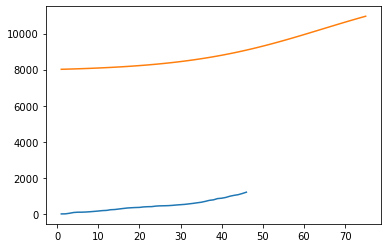

-77.54692887413195 0.059501292377717924 4673.824547102252


In [64]:
plt.plot(x,y)
plt.plot(x_exp,y_exp)
plt.show()
print( *popt)

In [ ]:
df_country_exp.head()